In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
from matplotlib.patches import Rectangle

In [3]:
datafolder = "data/"
imagefolder = "figures/"

In [20]:
with open(datafolder+"host_3892582.dat") as infile:
	with open(datafolder+"data.tsv", "w") as outfile:
		for line in infile:
			words = line.split()
			if words[0] == "#":
				words = words[1:]
				words[0] = "# " + words[0]
			newline = "\t".join(words) + "\n"
			outfile.write(newline)

In [4]:
df = pd.read_csv(datafolder+"data.tsv", delimiter="\t")

In [5]:
df

,# r3d,rproj,vproj,spin,mvirCl
0,82.640381,7.356626,-2.545786,1,4.411000e+14
1,82.690773,7.608857,-2.795247,1,4.411000e+14
2,82.420151,7.635076,-2.698712,1,4.411000e+14
3,81.850166,6.875649,-2.968227,1,4.411000e+14
4,82.397537,7.853687,-2.713821,1,4.411000e+14
...,...,...,...,...,...
378612,9.869965,9.217025,-0.177031,50,4.411000e+14
378613,9.974967,9.348437,-0.215424,50,4.411000e+14
378614,10.050404,9.597500,-0.257860,50,4.411000e+14
378615,9.523674,9.340288,-0.311612,50,4.411000e+14


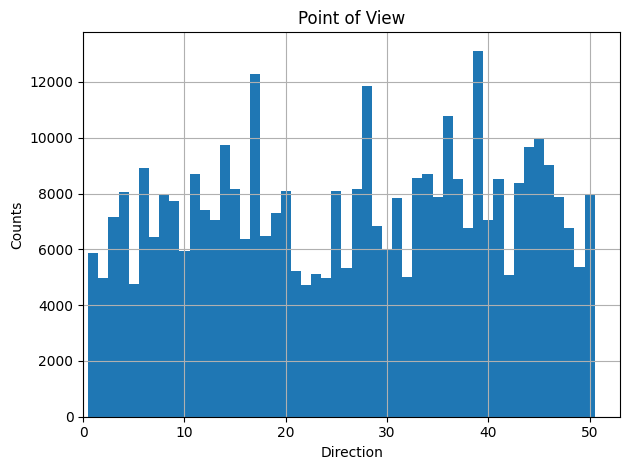

In [6]:
fig, ax = plt.subplots()
df["spin"].hist(bins=np.arange(0.5,51), ax=ax)
ax.set_title("Point of View")
ax.set_ylabel("Counts")
ax.set_xlabel("Direction")
ax.set_xlim(left=0)
fig.tight_layout()
fig.savefig(imagefolder+"spins.png")

<Axes: xlabel='rproj', ylabel='vproj'>

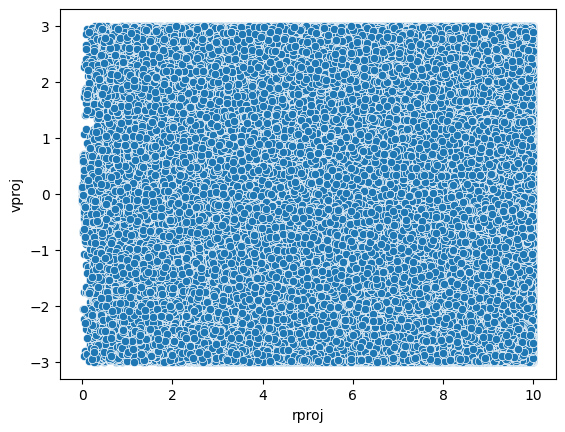

In [8]:
sb.scatterplot(data=df, x="rproj", y="vproj")

In [72]:
all_colours = ["Blue","Red","Green","Orange","Purple","Cyan"]

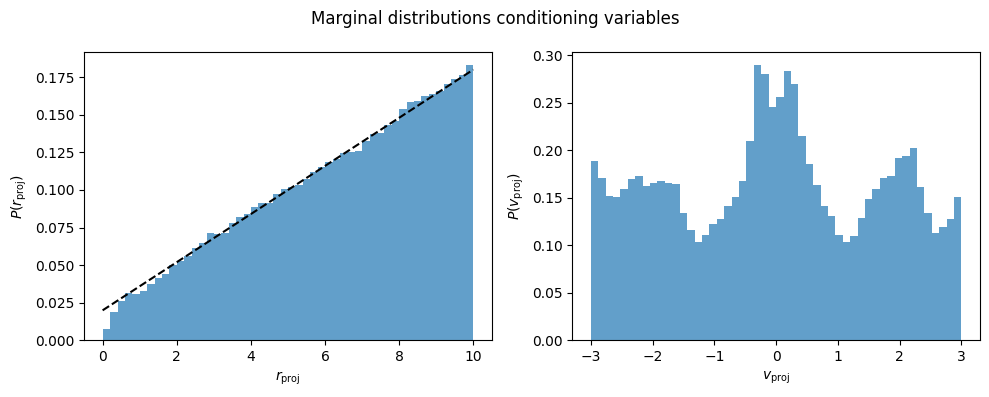

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))

df["rproj"].hist(bins=50, density=True, alpha=0.7, ax=axs[0])
df["vproj"].hist(bins=50, density=True, alpha=0.7, ax=axs[1])

#axs[0].add_patch(Rectangle((0.5,-0.01), 1, 0.32, facecolor="none", edgecolor=all_colours[0]))
#axs[0].add_patch(Rectangle((3,-0.01), 1, 0.32, facecolor="none", edgecolor=all_colours[1]))
#axs[0].add_patch(Rectangle((7.5,-0.01), 1, 0.32, facecolor="none", edgecolor=all_colours[2]))
#axs[1].add_patch(Rectangle((-2.5,-0.01), 1, 0.32, facecolor="none", edgecolor=all_colours[3]))
#axs[1].add_patch(Rectangle((1.5,-0.01), 1, 0.32, facecolor="none", edgecolor=all_colours[4]))
#axs[1].add_patch(Rectangle((-0.5,-0.01), 1, 0.32, facecolor="none", edgecolor=all_colours[5]))

axs[0].plot([0,10],[0.02,0.18], linestyle="--", color="k")

fig.suptitle("Marginal distributions conditioning variables")
axs[0].set_xlabel(r"$r_\mathrm{proj}$")
axs[1].set_xlabel(r"$v_\mathrm{proj}$")
axs[0].set_ylabel(r"$P(r_\mathrm{proj})$")
axs[1].set_ylabel(r"$P(v_\mathrm{proj})$")
for ax in axs:
	ax.set_ylim(bottom=0)
	ax.grid(False)
fig.tight_layout()
fig.savefig(imagefolder+"marginals.png")

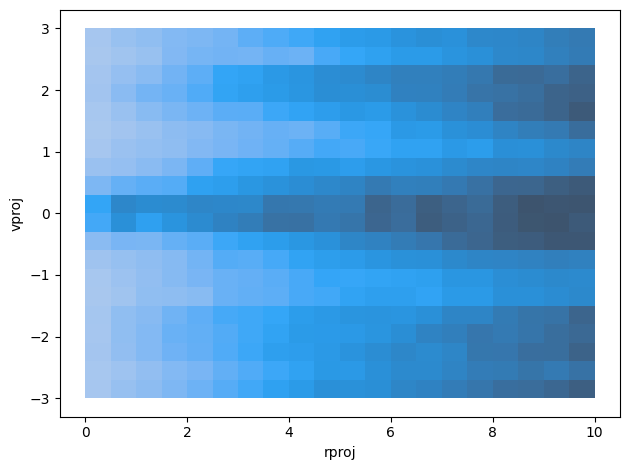

In [19]:
fig, ax = plt.subplots()

n_bins = 20
sb.histplot(data=df, x="rproj", y="vproj", bins=n_bins)

fig.tight_layout()
fig.savefig(imagefolder+"joint.png")

In [22]:
vbins

array([ 3. ,  2.7,  2.4,  2.1,  1.8,  1.5,  1.2,  0.9,  0.6,  0.3,  0. ,
       -0.3, -0.6, -0.9, -1.2, -1.5, -1.8, -2.1, -2.4, -2.7, -3. ])

In [27]:
fig, axs = plt.subplots(n_bins, n_bins, figsize=(n_bins*4,)*2)

vbins = np.linspace(3, -3, n_bins+1)
rbins = np.linspace(0, 10, n_bins+1)
binwidth = 5
r3dbins = np.arange(0, df["# r3d"].max()+binwidth, binwidth)

for i in range(n_bins):
	rmask = np.logical_and(df["rproj"]>=rbins[i], df["rproj"]<=rbins[i+1])
	for j in range(n_bins):
		vmask = np.logical_and(df["vproj"]>=vbins[j+1], df["vproj"]<=vbins[j])
		subset = df.loc[np.logical_and(rmask, vmask)]
		axs[j,i].hist(subset["# r3d"], bins=r3dbins, density=True)
		if j == n_bins - 1:
			axs[j,i].set_xlabel(r"$r_\mathrm{3D}$")
		else:
			axs[j,i].set_xticks([])
		if i == 0:
			axs[j,i].set_ylabel(r"$P(r_\mathrm{3D})$")
		else:
			axs[j,i].set_yticks([])
		axs[j,i].set_ylim([0,0.2])
		axs[j,i].legend(title=f"r={rbins[i:i+1].mean():.1f}, v={vbins[j:j+1].mean():.1f}")

fig.tight_layout()
fig.savefig(imagefolder+"histograms.png")
plt.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

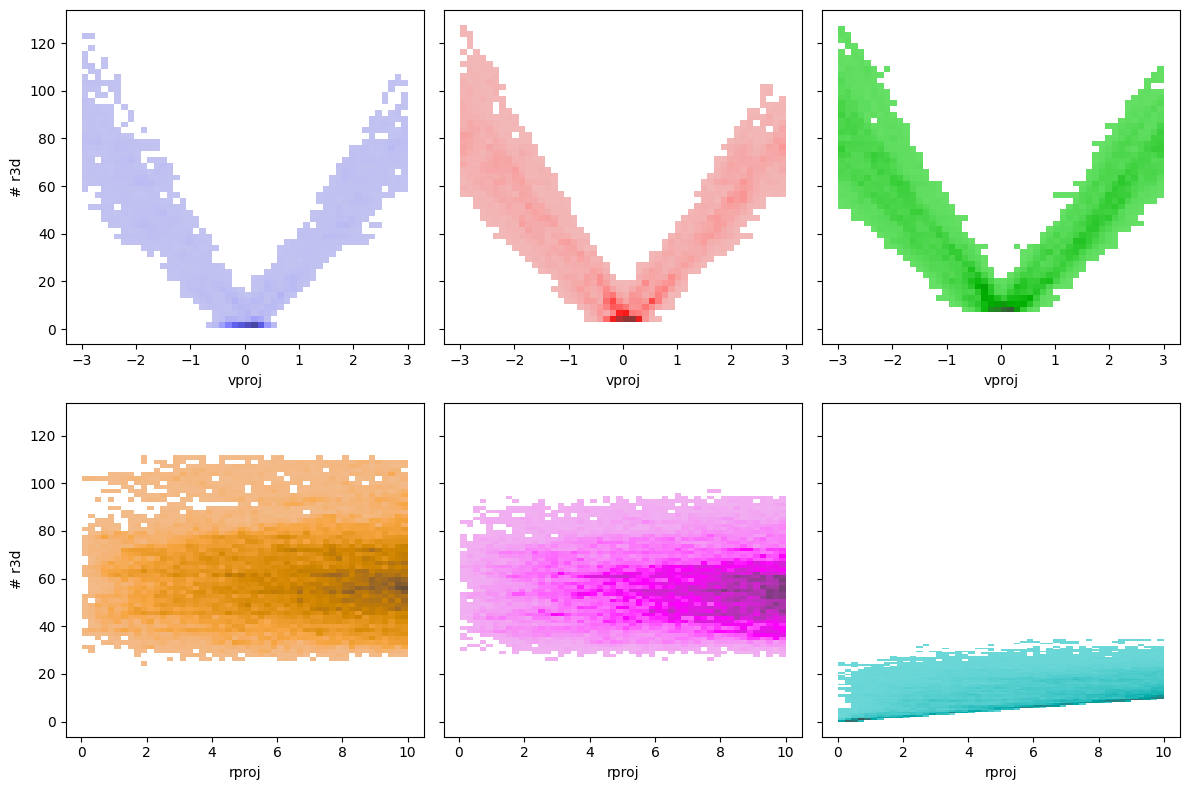

In [74]:
fig, axs = plt.subplots(2, 3, figsize=(12,8), sharey=True)
axs = axs.flatten()

subset = df.loc[np.logical_and(df["rproj"]>=0.5, df["rproj"]<=1.5)]
sb.histplot(data=subset, x="vproj", y="# r3d", bins=50, color=all_colours[0], ax=axs[0])

subset = df.loc[np.logical_and(df["rproj"]>=3, df["rproj"]<=4)]
sb.histplot(data=subset, x="vproj", y="# r3d", bins=50, color=all_colours[1], ax=axs[1])

subset = df.loc[np.logical_and(df["rproj"]>=7, df["rproj"]<=9)]
sb.histplot(data=subset, x="vproj", y="# r3d", bins=50, color=all_colours[2], ax=axs[2])

subset = df.loc[np.logical_and(df["vproj"]>=-2.5, df["vproj"]<=-1.5)]
sb.histplot(data=subset, x="rproj", y="# r3d", bins=50, color=all_colours[3], ax=axs[3])

subset = df.loc[np.logical_and(df["vproj"]>=1.5, df["vproj"]<=2.5)]
sb.histplot(data=subset, x="rproj", y="# r3d", bins=50, color=all_colours[4], ax=axs[4])

subset = df.loc[np.logical_and(df["vproj"]>=-0.5, df["vproj"]<=0.5)]
sb.histplot(data=subset, x="rproj", y="# r3d", bins=50, color=all_colours[5], ax=axs[5])

fig.tight_layout()
fig.savefig(imagefolder+"joint.png")